In [3]:
import numpy as np

In [5]:
a = np.arange(15).reshape(3, 5)


In [6]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [12]:
a = np.arange(20)

In [13]:
a.shape

(20,)

In [14]:
a.dtype.name

'int32'

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [16]:
data = pd.read_csv(r"C:\Users\Dee1\Downloads\creditcardfraud\creditcard.csv")
data = data.dropna()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [18]:
data.shape

(284807, 31)

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [21]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
target_label = data['Class']
target_label.value_counts()
X = data.iloc[:,:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, target_label, test_size=0.3, random_state = 42) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239A59043C8>,
      dtype=object)

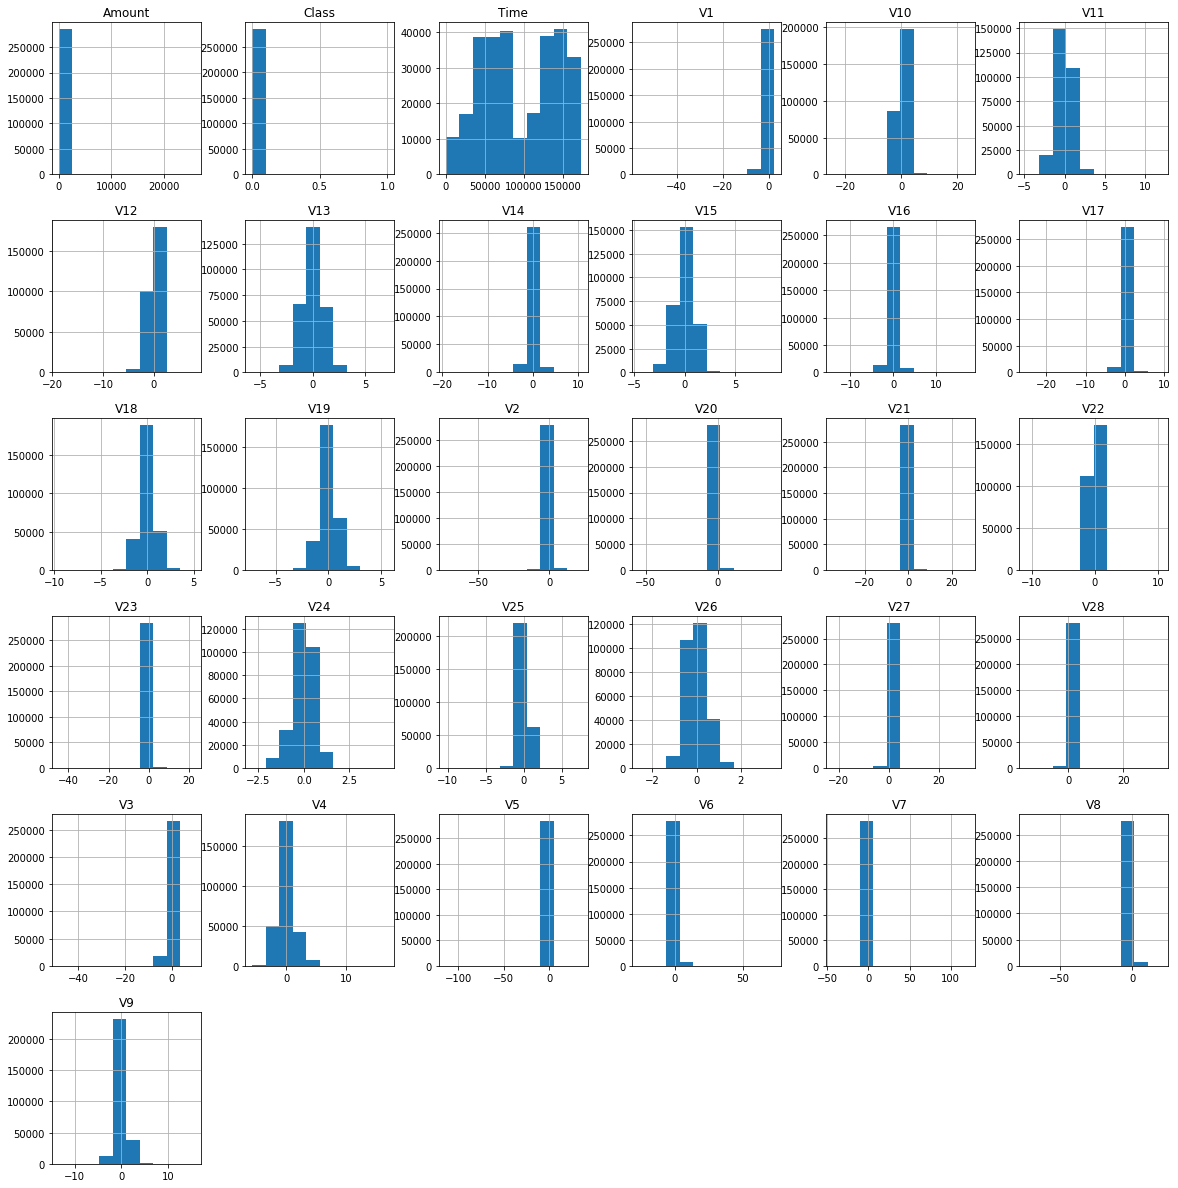

In [28]:
data.hist(figsize=(20,21))

Text(0, 0.5, 'Frequency')

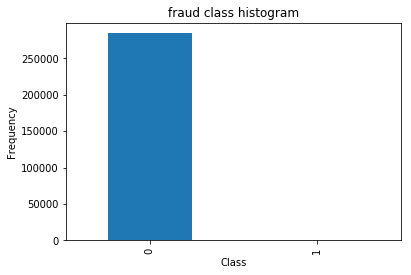

In [30]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


c:\users\dee1\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


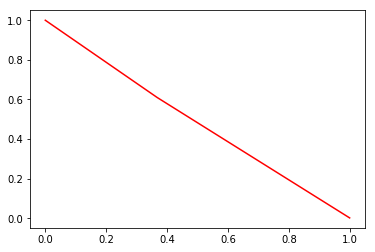

In [34]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report, precision_score
lr = LogisticRegression(C= 0.001, penalty='l1')
lr.fit(train_X, train_y.values.ravel())
y_test_pred = lr.predict(test_X)
precision, recall, threshholds = precision_recall_curve(test_y, y_test_pred)
plt.plot(recall, precision, color='red', label='precision-recallcurve')

In [35]:
import pandas as pd


In [40]:
names = ['dee', 'ro']
names[1]

'ro'

In [42]:
me = {'du': 25.66,
      'ro': 76.5666,
      'duhita': 75.333
}
print(me)

{'du': 25.66, 'ro': 76.5666, 'duhita': 75.333}


In [44]:
me['ro']

76.5666

In [45]:
me['duhita']

75.333

In [46]:
me['tune']

KeyError: 'tune'

In [47]:
10 * 3

30

In [48]:
10 / 5

2.0

In [49]:
10 % 5

0

In [50]:
10 == 5

False

In [51]:
10 > 4

True

In [52]:
10<8

False

In [53]:
10 !=2

True

In [54]:
def convert_to_F(celsius):
    prod = celsius * 1.8
    final = prod + 32
    return final

In [59]:
convert_to_F(0)

32.0

In [60]:
# series 
import pandas as pd

In [61]:
## PANDAS SERIES OPBJECT

In [62]:
ice = ["choco", 'vani', 'rum','verybery']
pd.Series(ice)

0       choco
1        vani
2         rum
3    verybery
dtype: object

In [64]:
lottery = [25,34,46,63,47]
pd.Series(lottery)

0    25
1    34
2    46
3    63
4    47
dtype: int64

In [65]:
reg = [True, False, False, False]
pd.Series(reg)

0     True
1    False
2    False
3    False
dtype: bool

In [66]:
web = {'ada': 'and', 'bab': 'sdjs','bsbd':'bfd','kdsx':'bds'}
pd.Series(web)


ada      and
bab     sdjs
bsbd     bfd
kdsx     bds
dtype: object

In [69]:
prices = [2.3,3.4,1.2]
s = pd.Series(prices)
s


0    2.3
1    3.4
2    1.2
dtype: float64

In [71]:
s.sum()

6.8999999999999995

In [72]:
s.product()

9.383999999999999

In [77]:
# Parameters and Arguments
fruits = ["apple","mangoes","grape"]
weekdays = ["mon","tue","wed"]
pd.Series(fruits, weekdays)
pd.Series(data = fruits, index = weekdays)
pd.Series(fruits, index = weekdays)

mon      apple
tue    mangoes
wed      grape
dtype: object

In [78]:
pd.read_csv("pokemon.csv")

FileNotFoundError: [Errno 2] File b'pokemon.csv' does not exist: b'pokemon.csv'

In [90]:
x = ([[1,2,3,4,5],[2,3,4,5,6],[6,7,8,9,1,]])
y = [6,7,8,9,10]
x

[[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [6, 7, 8, 9, 1]]

In [92]:
data = pd.read_csv(r"C:\Users\Dee1\Desktop\daily-total-female-births.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
Date      365 non-null object
Births    365 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [93]:
data.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [96]:
data = 'hello world'
print(data[0])
print(len(data))
print(data)

h
11
hello world


In [97]:
value = 123.1
print(value)
value = 10
print(value)

123.1
10


In [99]:
# if then else
value = 99
if value == 99:
    print('that is fast')
elif value > 200:
    print('that is too fast')
else:
    print('that is safe')

that is fast


In [101]:
# for loop
for i in range(10):
    print (i)

0
1
2
3
4
5
6
7
8
9


In [103]:
# while loop
i = 0
while i< 10:
    print(i)
    i +=1

0
1
2
3
4
5
6
7
8
9


In [104]:
# data structures 
# tuples lists and dictionaries
a = (1,2,3)
print(a)

(1, 2, 3)


In [111]:
# tuples
list = [1,2,3]
list.append(4)
list

[1, 2, 3, 4]

In [112]:
dict = {
    'hey tere': 2,
    'not now':3
}
dict

{'hey tere': 2, 'not now': 3}

In [114]:
list = [1,2,3]
array = np.array(list)
array

array([1, 2, 3])

In [115]:
array.shape

(3,)

In [116]:
list = [[1,2,3],[4,5,6]]
numarray = np.array(list)
print(numarray)

[[1 2 3]
 [4 5 6]]


In [118]:
numarray.shape

(2, 3)